In [34]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a25a523bb689e49c590dc93b39dc5ae2


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | pokrovsk
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | alta floresta
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | sungaipenuh
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | wahran
City not found. Skipping...
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | sistranda
Processing Record 15 of Set 1 | prince rupert
Processing Record 16 of Set 1 | abha
Processing Record 17 of Set 1 | praia
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 21 of Set 1 | amderma
City 

Processing Record 31 of Set 4 | avera
Processing Record 32 of Set 4 | mokshan
Processing Record 33 of Set 4 | sumoto
Processing Record 34 of Set 4 | livramento
Processing Record 35 of Set 4 | enid
Processing Record 36 of Set 4 | salalah
Processing Record 37 of Set 4 | cherskiy
Processing Record 38 of Set 4 | port hawkesbury
Processing Record 39 of Set 4 | himora
City not found. Skipping...
Processing Record 40 of Set 4 | kharitonovo
Processing Record 41 of Set 4 | liwale
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | srednekolymsk
Processing Record 44 of Set 4 | sorland
Processing Record 45 of Set 4 | tessalit
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | skelleftea
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | biak
Processing Record 50 of Set 4 | pridonskoy
Processing Record 1 of Set 5 | chicama
Processing Record 2 of Set 5 | kavaratti
Processing Record 3 of Set 5 | havelock
Processing Record 4 of Set 5 | salea

Processing Record 24 of Set 8 | longyearbyen
Processing Record 25 of Set 8 | san pedro
Processing Record 26 of Set 8 | general roca
Processing Record 27 of Set 8 | esfarayen
Processing Record 28 of Set 8 | komsomolskiy
Processing Record 29 of Set 8 | ca mau
Processing Record 30 of Set 8 | alofi
Processing Record 31 of Set 8 | naze
Processing Record 32 of Set 8 | bathsheba
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | makakilo city
Processing Record 35 of Set 8 | ishigaki
Processing Record 36 of Set 8 | ixcatlan
City not found. Skipping...
Processing Record 37 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 8 | korla
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | pangnirtung
Processing Record 41 of Set 8 | tarakan
Processing Record 42 of Set 8 | mantua
Processing Record 43 of Set 8 | allanridge
Processing Record 44 of Set 8 | lerwick
Processing Record 45 of Set 8 | catuday
Processing Record 46 of Set 8 

Processing Record 13 of Set 12 | antalaha
Processing Record 14 of Set 12 | sao filipe
Processing Record 15 of Set 12 | yakeshi
Processing Record 16 of Set 12 | olafsvik
Processing Record 17 of Set 12 | poli
Processing Record 18 of Set 12 | solvychegodsk
Processing Record 19 of Set 12 | iqaluit
Processing Record 20 of Set 12 | lermontovka
Processing Record 21 of Set 12 | tallahassee
Processing Record 22 of Set 12 | bunia
Processing Record 23 of Set 12 | mouzakion
City not found. Skipping...
Processing Record 24 of Set 12 | zonguldak
Processing Record 25 of Set 12 | labe
Processing Record 26 of Set 12 | dicabisagan
Processing Record 27 of Set 12 | zhanaozen
Processing Record 28 of Set 12 | cruzeiro do oeste
Processing Record 29 of Set 12 | suntar
Processing Record 30 of Set 12 | micheweni
Processing Record 31 of Set 12 | magdalena
Processing Record 32 of Set 12 | acapulco
Processing Record 33 of Set 12 | itoman
Processing Record 34 of Set 12 | wagar
Processing Record 35 of Set 12 | uyuni

In [7]:
len(city_data)

566

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,80.01,83,75,8.05,MU,2021-04-07 22:55:52
1,Mount Gambier,-37.8333,140.7667,59.00,77,57,8.05,AU,2021-04-07 22:54:30
2,Pokrovsk,48.2820,37.1758,45.81,85,60,14.74,UA,2021-04-07 22:55:53
3,Busselton,-33.6500,115.3333,57.00,90,68,1.01,AU,2021-04-07 22:54:37
4,Alta Floresta,-9.8756,-56.0861,73.58,90,100,1.34,BR,2021-04-07 22:54:51
5,Butaritari,3.0707,172.7902,81.63,78,16,13.87,KI,2021-04-07 22:54:27
6,Tura,25.5198,90.2201,66.97,82,0,5.28,IN,2021-04-07 22:55:53
7,Upernavik,72.7868,-56.1549,-2.63,94,17,5.95,GL,2021-04-07 22:54:22
8,Sungaipenuh,-2.0833,101.3833,62.01,92,97,1.63,ID,2021-04-07 22:55:54
9,Hermanus,-34.4187,19.2345,62.01,89,24,3.00,ZA,2021-04-07 22:54:56


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2021-04-07 22:55:52,-20.3428,57.7575,80.01,83,75,8.05
1,Mount Gambier,AU,2021-04-07 22:54:30,-37.8333,140.7667,59.00,77,57,8.05
2,Pokrovsk,UA,2021-04-07 22:55:53,48.2820,37.1758,45.81,85,60,14.74
3,Busselton,AU,2021-04-07 22:54:37,-33.6500,115.3333,57.00,90,68,1.01
4,Alta Floresta,BR,2021-04-07 22:54:51,-9.8756,-56.0861,73.58,90,100,1.34
...,...,...,...,...,...,...,...,...,...
561,Mackay,AU,2021-04-07 22:58:34,-21.1500,149.2000,79.00,88,37,4.61
562,Prainha,BR,2021-04-07 22:58:35,-1.8000,-53.4800,77.72,85,100,3.09
563,San Patricio,US,2021-04-07 22:54:35,28.0170,-97.5169,87.80,58,40,10.36
564,Jalu,LY,2021-04-07 22:55:17,29.0331,21.5482,64.51,30,23,9.40


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

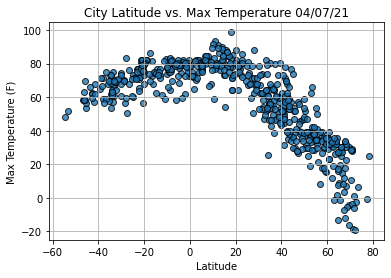

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

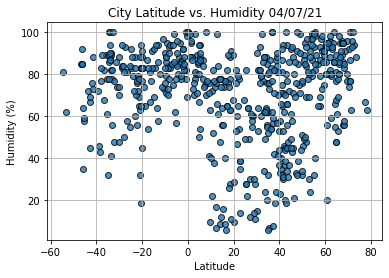

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

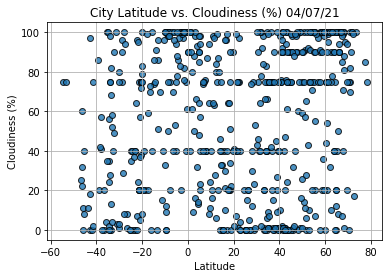

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

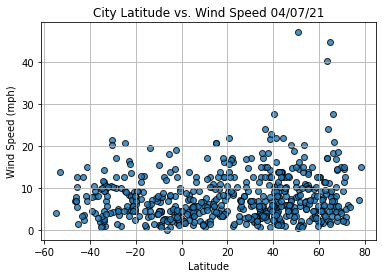

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                Prince Rupert
Country                        CA
Date          2021-04-07 22:55:55
Lat                       54.3161
Lng                       -130.32
Max Temp                       41
Humidity                       87
Cloudiness                     75
Wind Speed                   6.91
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
561    False
562    False
563     True
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [19]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Pokrovsk,UA,2021-04-07 22:55:53,48.2820,37.1758,45.81,85,60,14.74
5,Butaritari,KI,2021-04-07 22:54:27,3.0707,172.7902,81.63,78,16,13.87
6,Tura,IN,2021-04-07 22:55:53,25.5198,90.2201,66.97,82,0,5.28
7,Upernavik,GL,2021-04-07 22:54:22,72.7868,-56.1549,-2.63,94,17,5.95
11,Jamestown,US,2021-04-07 22:54:18,42.0970,-79.2353,69.80,46,1,13.80


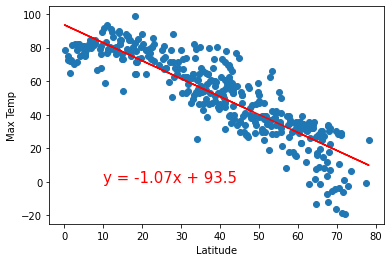

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,0))


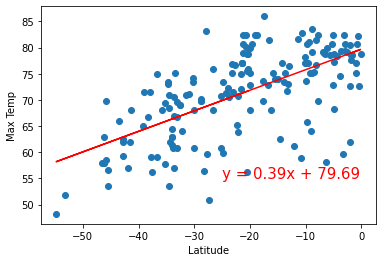

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-25,55))

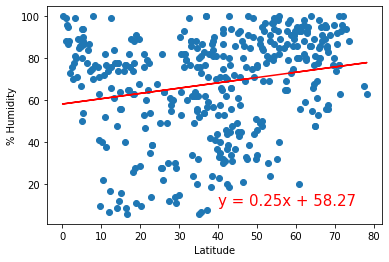

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

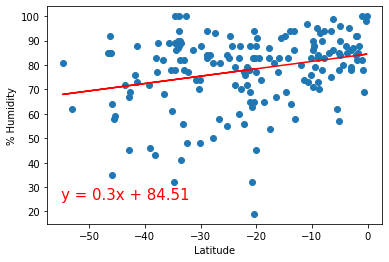

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,25))

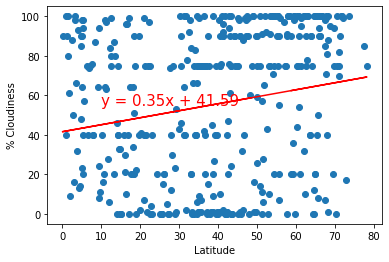

In [31]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

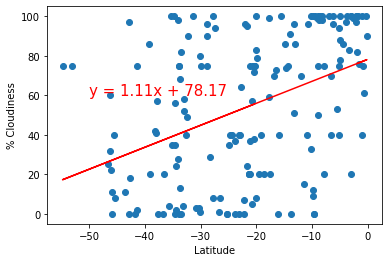

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

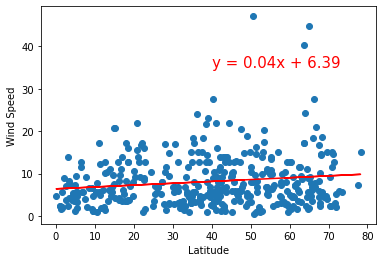

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

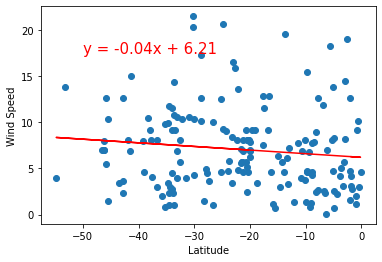

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,17.5))